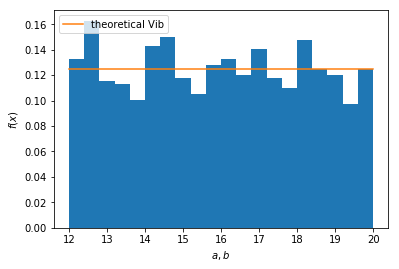

In [56]:
import pandas as pd
import numpy as np
from scipy import stats as sts
from matplotlib import pyplot as plt
a = 12
b = 20
vib_rv= sts.uniform(a, b-a)
viborka = vib_rv.rvs(1000)
plt.hist(viborka, bins = 20, normed=True)
xy= np.linspace(a,b,100)
pdf = vib_rv.pdf(x)
plt.plot(x, pdf, label='theoretical Vib')
plt.ylabel('$f(x)$')
plt.xlabel('$a,b$')
plt.legend(loc='upper left')
plt.show()

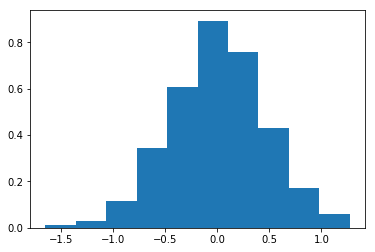

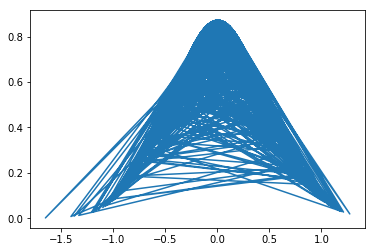

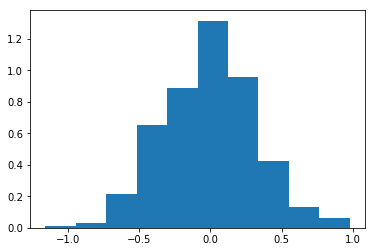

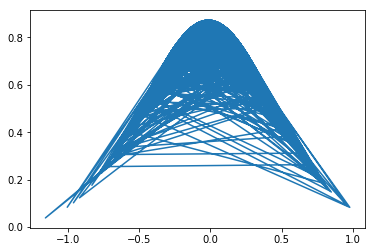

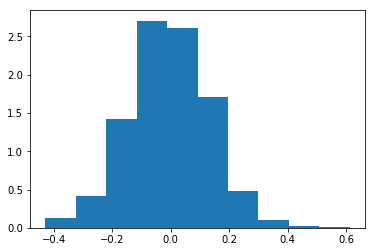

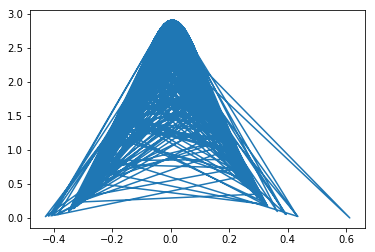

In [75]:
import pandas as pd
import numpy as np
from scipy import stats as sts
from matplotlib import pyplot as plt
i = 0 #ONE_ONE
k = []
while i < 1000:
    x = np.random.randn(1,5)
    mean = x.mean()
    k.append(mean)
    i = i + 1
plt.hist(k,bins = 10,normed=True)
plt.show()
sred_arefmet_1 = np.mean(k)
nu_1 = sred_arefmet_1
i_1 = 0   #start sigma
summa_1 = 0
while i_1 < 1000:
    summa_1 += (k[i_1] - sred_arefmet_1)**2
    i_1 = i_1 + 1
sigma_1 = math.sqrt(summa_1/1000) #finish sigma
i_2 = 0
plotnost_1 = []
while i_2 < 1000:
    w_1 = math.exp(-(k[i_2]-nu_1)**2/(2*sigma_1**2))/(sigma_1*math.sqrt(2*math.pi))#final equation
    plotnost_1.append(w_1)
    i_2 = i_2 + 1
plt.plot(k,  plotnost_1, label='theoretical Vib')
plt.show()
j = 0 #TWO_TWO
m = []
while j < 1000:
    y = np.random.randn(1,10)
    mean = y.mean()
    m.append(mean)
    j = j + 1
plt.hist(m,bins = 10,normed=True)
plt.show()
sred_arefmet_2 = np.mean(m)
nu_2 = sred_arefmet_2
j_1 = 0   #start sigma
summa_2 = 0
while j_1 < 1000:
    summa_2 += (m[j_1] - sred_arefmet_2)**2
    j_1 = j_1 + 1
sigma_2 = math.sqrt(summa_1/1000) #finish sigma
j_2 = 0
plotnost_2 = []
while j_2 < 1000:
    w_2 = math.exp(-(m[j_2]-nu_2)**2/(2*sigma_2**2))/(sigma_2*math.sqrt(2*math.pi))#final equation
    plotnost_2.append(w_2)
    j_2 = j_2 + 1
plt.plot(m,  plotnost_2, label='theoretical Vib')
plt.show()
l = 0 #THREE_THREE
n = []
while l < 1000:
    z = np.random.randn(1,50)
    mean = z.mean()
    n.append(mean)
    l = l + 1
plt.hist(n,bins = 10,normed=True)
plt.show()
sred_arefmet_3 = np.mean(n)
nu_3 = sred_arefmet_3
l_1 = 0   #start sigma
summa_3 = 0
while l_1 < 1000:
    summa_3 += (n[l_1] - sred_arefmet_3)**2
    l_1 = l_1 + 1
sigma_3 = math.sqrt(summa_3/1000) #finish sigma
l_2 = 0
plotnost_3 = []
while l_2 < 1000:
    w_3 = math.exp(-(n[l_2]-nu_1)**2/(2*sigma_3**2))/(sigma_3*math.sqrt(2*math.pi))#final equation
    plotnost_3.append(w_3)
    l_2 = l_2 + 1
plt.plot(n,  plotnost_3, label='theoretical Vib')
plt.show()

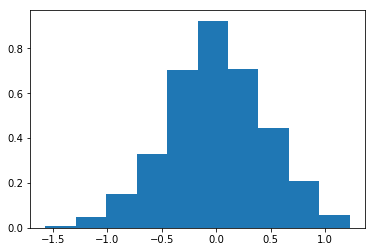

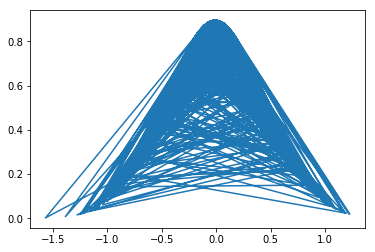

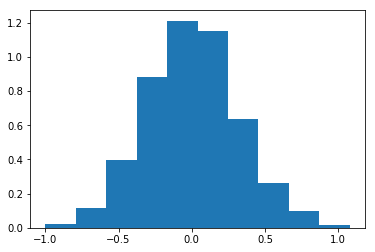

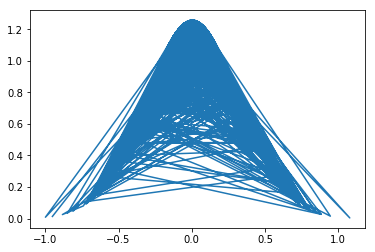

In [79]:
import pandas as pd
import numpy as np
from scipy import stats as sts
from matplotlib import pyplot as plt
i = 0 #ONE_ONE
k = []
while i < 1000:
    x = np.random.randn(1,5)
    mean = x.mean()
    k.append(mean)
    i = i + 1
plt.hist(k,bins = 10,normed=True)
plt.show()
sred_arefmet_1 = np.mean(k)
nu_1 = sred_arefmet_1
i_1 = 0   #start sigma
summa_1 = 0
while i_1 < 1000:
    summa_1 += (k[i_1] - sred_arefmet_1)**2
    i_1 = i_1 + 1
sigma_1 = math.sqrt(summa_1/1000) #finish sigma
norm_rv1 = sts.norm(nu_1, sigma_1)
sample1 = norm_rv1.rvs(1000)
pdf = norm_rv.pdf(k)
plt.plot(k, pdf)
plt.show()
j = 0 #TWO_TWO
m = []
while j < 1000:
    y = np.random.randn(1,10)
    mean = y.mean()
    m.append(mean)
    j = j + 1
plt.hist(m,bins = 10,normed=True)
plt.show()
sred_arefmet_2 = np.mean(m)
nu_2= sred_arefmet_2
j_1 = 0   #start sigma
summa_2 = 0
while j_1 < 1000:
    summa_2 += (m[j_1] - sred_arefmet_2)**2
    j_1 = j_1 + 1
sigma_2 = math.sqrt(summa_2/1000) #finish sigma
norm_rv2 = sts.norm(nu_2, sigma_2)
sample2 = norm_rv2.rvs(1000)
pdf = norm_rv2.pdf(m)
plt.plot(m, pdf)
plt.show()

[-0.27741846283817928, 0.57773027162541024, -0.46989897865789165, -0.20449623441936637, -0.19035604871005107]


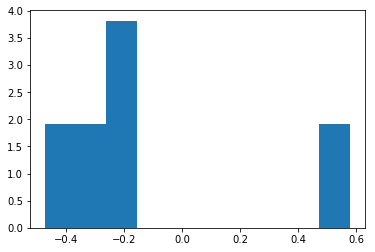

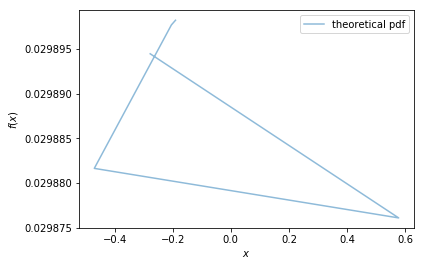

In [69]:
import pandas as pd
import numpy as np
from scipy import stats as sts
from matplotlib import pyplot as plt
i = 0
k = []
while i < 5:
    x = np.random.randn(1,5)
    mean = x.mean()
    k.append(mean)
    i = i + 1
print k
plt.hist(k,bins = 10,normed=True)
plt.show()
pdf = norm_rv.pdf(k)
plt.plot(k, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()